In [1]:
!pip install colabcode
!pip install fastapi

     |████████████████████████████████| 8.3 MB 6.4 MB/s 
     |████████████████████████████████| 45 kB 4.3 MB/s 
     |████████████████████████████████| 745 kB 61.4 MB/s 
     |████████████████████████████████| 392 kB 42.5 MB/s 
     |████████████████████████████████| 56 kB 5.0 MB/s 
     |████████████████████████████████| 428 kB 33.4 MB/s 
     |████████████████████████████████| 54 kB 3.6 MB/s 
     |████████████████████████████████| 77 kB 8.1 MB/s 
     |████████████████████████████████| 112 kB 65.9 MB/s 
     |████████████████████████████████| 68 kB 8.7 MB/s 
     |████████████████████████████████| 56 kB 5.7 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-py3-none-any.whl size=19262 sha256=7af63826b2408fdd668bb3675f1dffa270d4a7304c81a36507ad2073d2224f93
  Stored in directory: /root/.cache/pip/wheels/1b/f7/72/35c95a53d15b91dd00df6cf1304d49a31ec5ed6f954c2d4e32
Successfully built pyngrok
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninst

     |████████████████████████████████| 51 kB 14 kB/s 
     |████████████████████████████████| 10.1 MB 14.9 MB/s 
     |████████████████████████████████| 60 kB 8.1 MB/s 


In [5]:
#importing the required libraries & packages
import pandas as pd
import numpy as np
import time
import argparse
import string
from sklearn.model_selection import train_test_split
from nltk.tokenize import regexp_tokenize
from datetime import datetime
import pytz
from sklearn.utils import shuffle
import pickle

In [7]:
data_frame = pd.read_csv("/content/drive/MyDrive/airline_sentiment_analysis.csv")

In [8]:
data_frame.head()

,Unnamed: 0,airline_sentiment,text
0,1,positive,@VirginAmerica plus you've added commercials t...
1,3,negative,@VirginAmerica it's really aggressive to blast...
2,4,negative,@VirginAmerica and it's a really big bad thing...
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...
4,6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [9]:
data_frame = data_frame.drop(['Unnamed: 0'], axis = 1)
data_frame.head()

,airline_sentiment,text
0,positive,@VirginAmerica plus you've added commercials t...
1,negative,@VirginAmerica it's really aggressive to blast...
2,negative,@VirginAmerica and it's a really big bad thing...
3,negative,@VirginAmerica seriously would pay $30 a fligh...
4,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [10]:
data_frame.head()

,airline_sentiment,text
0,positive,@VirginAmerica plus you've added commercials t...
1,negative,@VirginAmerica it's really aggressive to blast...
2,negative,@VirginAmerica and it's a really big bad thing...
3,negative,@VirginAmerica seriously would pay $30 a fligh...
4,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [11]:
data_frame = shuffle(data_frame,random_state = 42)
data_frame.head()

,airline_sentiment,text
9193,negative,@USAirways They charged me for a flight they C...
6112,positive,@JetBlue great flight! Great view! :-) http://...
967,negative,"@united they're not, actually. gate agent was ..."
11279,negative,@AmericanAir No worries they called back 4 hrs...
3061,positive,@united thank you. There was one here a few mo...


In [12]:
data_frame = data_frame.reset_index()
data_frame.head()

,index,airline_sentiment,text
0,9193,negative,@USAirways They charged me for a flight they C...
1,6112,positive,@JetBlue great flight! Great view! :-) http://...
2,967,negative,"@united they're not, actually. gate agent was ..."
3,11279,negative,@AmericanAir No worries they called back 4 hrs...
4,3061,positive,@united thank you. There was one here a few mo...


In [13]:
data_frame = data_frame.drop(['index'],axis = 1)
data_frame.head()

,airline_sentiment,text
0,negative,@USAirways They charged me for a flight they C...
1,positive,@JetBlue great flight! Great view! :-) http://...
2,negative,"@united they're not, actually. gate agent was ..."
3,negative,@AmericanAir No worries they called back 4 hrs...
4,positive,@united thank you. There was one here a few mo...


In [14]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11541 entries, 0 to 11540
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  11541 non-null  object
 1   text               11541 non-null  object
dtypes: object(2)
memory usage: 180.5+ KB


In [15]:
data_frame['airline_sentiment'].unique()

array(['negative', 'positive'], dtype=object)

In [16]:
data_frame['airline_sentiment'].describe()

count        11541
unique           2
top       negative
freq          9178
Name: airline_sentiment, dtype: object

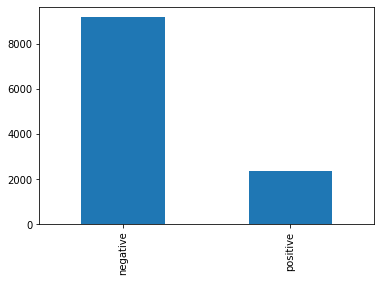

In [17]:
import matplotlib.pyplot as plt

data_frame['airline_sentiment'].value_counts().plot.bar()
plt.show()

In [18]:
#repalcing the categorical values of 'airline_sentiment' to numeric values: Positive - 1, Negative - 0
data_frame['airline_sentiment'].replace(('positive', 'negative'), (1, 0), inplace=True)
data_frame['airline_sentiment'].value_counts()

0    9178
1    2363
Name: airline_sentiment, dtype: int64

In [19]:
#forming the feature & label variables
data = data_frame['text'].values.tolist()
labels = data_frame['airline_sentiment'].values.tolist()

In [20]:
#First five samples text
data[:5]

['@USAirways They charged me for a flight they Cancelled Flightled, unbelievable and unheard of',
 '@JetBlue great flight! Great view! :-) http://t.co/Yxn00pnOav',
 "@united they're not, actually. gate agent was so rude. now standing in a line waiting for reFlight Booking Problems. missed the only flight to STI. awful.",
 "@AmericanAir No worries they called back 4 hrs Late Flightr while I was asleep and took an additional $200 fee. So by AA standards everything's gr8",
 "@united thank you. There was one here a few months ago, but none now. Weird you don't have a club in one of the busiest airports in the US."]

In [21]:
#first 5 samples label
labels[:5]

[0, 1, 0, 0, 1]

In [22]:
#splitting the data into 80 and 20 split
train_X, test_X, y_train, y_test = train_test_split(data, labels, test_size=0.2, 
                                                    random_state=42, shuffle=True)

print(f'Number of training examples: {len(train_X)}')
print(f'Number of testing examples: {len(test_X)}')

Number of training examples: 9232
Number of testing examples: 2309


**Text preprocessing**

In [23]:
# Here is a default pattern for tokenization
default_pattern =  r"""(?x)                  
                        (?:[A-Z]\.)+          
                        |\$?\d+(?:\.\d+)?%?    
                        |\w+(?:[-']\w+)*      
                        |\.\.\.               
                        |(?:[.,;"'?():-_`])    
                    """

In [24]:
#funtion for tokenizing the data
def tokenize(text, pattern = default_pattern):
  text = text.lower()
  return regexp_tokenize(text, pattern)

In [25]:
# Tokenize training text into tokens
tokenized_text = []
for i in range(0, len(train_X)):
    tokenized_text.append(tokenize(train_X[i]))

X_train = tokenized_text

# Tokenize testing text into tokens
tokenized_text = []
for i in range(0, len(test_X)):
    tokenized_text.append(tokenize(test_X[i]))

X_test = tokenized_text

In [26]:
#tokenized train & test data
print(X_train[0], X_train[1])
print(X_test[0])

['@', 'usairways', 'been', 'on', 'hold', '2.5', 'hours', 'now', 'system', 'hung', 'up', 'on', 'me', 'twice', 'after', 'an', 'hour', 'holding', '.', ':', '(', 'trying', '2', 'correct', 'online', 'flight', 'booking', 'problems', 'error', '.', 'unhappy'] ['@', 'americanair', 'what', 'is', 'that', '?', 'why', 'even', 'bother', 'catering', 'dog', 'food', 'that', 'no', 'one', 'will', 'eat', '?', 'http', ':', 't', '.', 'co', 'ifespcbztm']
['@', 'americanair', 'can', 'you', 'tell', 'me', 'why', 'all', 'flights', 'from', 'xna', '2', 'dfw', 'are', 'cancelled', 'flightled', 'for', 'tomorrow', 'morning', 'already', '?']


In [27]:
#building dictionary
def createDictionary(data):
  """ Function: To create a dictionary of tokens from the data
  Arguments: data in the type - list
  Returns: Sorted dictionary of the tokens and their count in the data """

  dictionary = dict()
  for sample in  data:
    for token in sample:
      dictionary[token] = dictionary.get(token, 0) + 1
  #sorting the dictionary based on the values
  sorted_dict = sorted(dictionary.items(), key=lambda x: x[1], reverse=True)
  return dict(sorted_dict)

In [28]:
bog = createDictionary(X_train)
#top 10 items in the dictionary
print("Top 10 tokens in the training dictionary:\n")
list(bog.items())[:10]

Top 10 tokens in the training dictionary:



[('.', 10616),
 ('@', 10369),
 ('to', 5633),
 ('the', 4027),
 ('i', 3425),
 ('a', 2967),
 (',', 2837),
 ('united', 2734),
 ('you', 2721),
 ('for', 2719)]

In [29]:
#Navie Bayes Classifier 
class NBClassifier:

    def __init__(self, X_train, y_train, size):
      # tz_NY = pytz.timezone('America/New_York') 
      # print("Model Start Time:", datetime.now(tz_NY).strftime("%H:%M:%S"))
      self.X_train = X_train
      self.y_train = y_train
      self.size = size

    def createDictionary(self):
      """ Function: To create a dictionary of tokens from the data
      Arguments: data in the type - list
      Returns: Sorted dictionary of the tokens and their count in the data """
      dictionary = dict()
      for sample in  X_train:
        for token in sample:
          dictionary[token] = dictionary.get(token, 0) + 1
      #sorting the dictionary based on the values
      sorted_dict = sorted(dictionary.items(), key=lambda x: x[1], reverse=True)
      return dict(sorted_dict)
    
    def fit(self):
      """ Function: To compute the count of words in training data dictionary
        Arguments: Trianing data & Size of dictionary
        Returns: dictionary of tokens with their class wise probabilities """
      
      X_train_dict = self.createDictionary()
      if self.size == 'full':
        self.words_list = list(X_train_dict.keys())
        self.words_count = dict.fromkeys(self.words_list, None)
      else:
        self.words_list = list(X_train_dict.keys())[:int(self.size)]
        self.words_count = dict.fromkeys(self.words_list, None)
            
      #DataFrame of training data
      train = pd.DataFrame(columns = ['X_train', 'y_train'])
      train['X_train'] = X_train
      train['y_train'] = y_train

      train_0 = train.copy()[train['y_train'] == 0]
      train_1 = train.copy()[train['y_train'] == 1]
      train_2 = train.copy()[train['y_train'] == 2]

      #computing the prior of each class
      Pr0 = train_0.shape[0]/train.shape[0]
      Pr1 = train_1.shape[0]/train.shape[0]
      Pr2 = train_2.shape[0]/train.shape[0]
      
      self.Prior = np.array([Pr0, Pr1, Pr2])
        
      #converting list of lists into a list
      def flatList(listOfList):
        flatten = []
        for elem in listOfList:
          flatten.extend(elem)
        return flatten
  
      #Creating the data list for each class - tokens of each class
      X_train_0 = flatList(train[train['y_train'] == 0]['X_train'].tolist())
      X_train_1 = flatList(train[train['y_train'] == 1]['X_train'].tolist())
      X_train_2 = flatList(train[train['y_train'] == 2]['X_train'].tolist())
    
      self.X_train_len = np.array([len(X_train_0), len(X_train_1), len(X_train_2)])

      for token in self.words_list:
        #list to store three word counts of a token
        res = []

        #inserting count of token in class 0: Neutral
        res.insert(0, X_train_0.count(token))

        #inserting count of token in class 1: Positive
        res.insert(1, X_train_1.count(token))

          #inserting count of token in class 2: Negative
        res.insert(2, X_train_2.count(token))

        #assigning the count list to its token in the dictionary 
        self.words_count[token] = res
      return self

    def predict(self, X_test):
      """ Function: Predicts the label of the data
        Arguments: self and the test data
        Returns: List of predicted labels for the test data """     
      pred = []
      for sample in X_test:
        mul = np.array([1,1,1])
        for tokens in sample:
          vocab_count = len(self.words_list)
          if tokens in self.words_list:
            prob = ((np.array(self.words_count[tokens])+1) / (self.X_train_len + vocab_count))
          #except:
            #prob = ((np.array([0,0,0])+1) / (self.X_train_len + vocab_count))
          mul = mul * prob
        val = mul * self.Prior
        pred.append(np.argmax(val))
      tz_NY = pytz.timezone('America/New_York') 
      print("Model End Time:", datetime.now(tz_NY).strftime("%H:%M:%S"))
      return pred
    
    def score(self, pred, labels):
      """ Function: To compute the perfoemance of the model
        Arguments: self, predicted labels and actual labels of the test data
        Returns: Number of lables correctly predicted and the accuracy of the model """
      correct = (np.array(pred) == np.array(labels)).sum()
      accuracy = correct/len(pred)
      return correct, accuracy

In [30]:
#string of punctiations
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
#Removing the punctuation
'''Function: Removes the punctuation from the tokens
   Arguments: list of text data samples
   Returns: list of tokens of each sample without punctuation '''
def removePunctuation(data):
    update = []
    for sample in data:
        #removing punctuation from the tokens
        re_punct = [''.join(char for char in word if char not in string.punctuation) for word in sample]
        #removes the empty strings
        re_punct = [word for word in re_punct if word]
       
        update.append(re_punct)
    return update

In [32]:
#Removing punctuation from training data text tokens  
X_train = removePunctuation(X_train)

#Removing punctuation from testing data text tokens
X_test = removePunctuation(X_test)

#train & test data after removing punctuation
print(X_train[0])
print(X_test[0])

['usairways', 'been', 'on', 'hold', '25', 'hours', 'now', 'system', 'hung', 'up', 'on', 'me', 'twice', 'after', 'an', 'hour', 'holding', 'trying', '2', 'correct', 'online', 'flight', 'booking', 'problems', 'error', 'unhappy']
['americanair', 'can', 'you', 'tell', 'me', 'why', 'all', 'flights', 'from', 'xna', '2', 'dfw', 'are', 'cancelled', 'flightled', 'for', 'tomorrow', 'morning', 'already']


In [33]:
'''Function: Removes the stopwords from the tokens'''
def removeStopWords(data):
    update = []
    stopwords = ['the', 'at','i', 'of', 'us', 'have', 'a', 'you','ours', 'themselves', 
                 'that', 'this', 'be', 'is', 'for']
    for sample in data:
        #removing stopwords from tokenized data
        re_stop = [word for word in sample if word not in stopwords]
        
        update.append(re_stop)
    return update

In [34]:
#Removing stopwords from training data text tokens  
X_train = removeStopWords(X_train)

#Removing stopwords from testing data text tokens
X_test = removeStopWords(X_test)

#train & test data after removing stopwords
print(X_train[0])
print(X_test[0])

['usairways', 'been', 'on', 'hold', '25', 'hours', 'now', 'system', 'hung', 'up', 'on', 'me', 'twice', 'after', 'an', 'hour', 'holding', 'trying', '2', 'correct', 'online', 'flight', 'booking', 'problems', 'error', 'unhappy']
['americanair', 'can', 'tell', 'me', 'why', 'all', 'flights', 'from', 'xna', '2', 'dfw', 'are', 'cancelled', 'flightled', 'tomorrow', 'morning', 'already']


In [35]:
#total tokens in training dictionary
print('Total tokens in the dictionary:', len(bog))

Total tokens in the dictionary: 11400


In [40]:
#training the classifier     
nb = NBClassifier(X_train, y_train, '5000')  
nb.fit()

#predicting the labels for test samples
y_pred = nb.predict(X_test)

#Checking
print("NBClassifier Model miss any prediction???", len(X_test) != len(y_pred))

Model End Time: 08:20:09
NBClassifier Model miss any prediction??? False


In [41]:
#Performance of the classifier
cor1, acc1 = nb.score(y_pred, y_test)
print("Count of Correct Predictions:", cor1)
print("Accuracy of the model: %i / %i = %.4f " %(cor1, len(y_pred), acc1))

Count of Correct Predictions: 2112
Accuracy of the model: 2112 / 2309 = 0.9147 


**Developing API server using Fast API and Swagger UI**

In [44]:
#Saving the model
Pkl_Filename = "Naive_Bayes.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(nb, file)

In [45]:
from pydantic import BaseModel

class Text(BaseModel):
    english_text:list
    
    class Config:
        schema_extra = {
            "example": {
                "english_text": ["This is the worst flight for travelling"]
            }
        }

In [46]:
from fastapi import FastAPI
import pickle

app = FastAPI()

@app.on_event("startup")
def load_model():
    global model
    model = pickle.load(open("Naive_Bayes.pkl", "rb"))

@app.get('/')
def index():
    return {'message': 'This is the homepage of the API '}

@app.post('/predict')
def get_sentiment(data:Text):
    received = data.dict()
    text = received['english_text']
    tokenized_text = []
    for i in range(0, len(text)):
        tokenized_text.append(tokenize(text[i]))
    text = tokenized_text
    text = removePunctuation(text)
    text = removeStopWords(text)
    
    pred_category = model.predict(text)
    if pred_category[0] == 1:
      pred = "positive"
    else:
        pred = "negative"
        
    return {'prediction': pred}

In [47]:
from colabcode import ColabCode
server = ColabCode(port=10000, code=False)

In [ ]:
server.run_app(app=app)

INFO:     Started server process [62]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:10000 (Press CTRL+C to quit)


Public URL: NgrokTunnel: "https://c11fc88c73c0.ngrok.io" -> "http://localhost:10000"


In [ ]:
# !pip freeze > requirements.txt